*Завдання 1: Завантажте MNIST. Розбийте його на навчальну, валідаційну та тренувальну вибірку. Застосуйте PCA для зменшення розмірності.*

In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Загрузив так бо локалхост раню

In [2]:
import pickle
import numpy as np

with open('mnist_data.pkl', 'rb') as f:
    mnist = pickle.load(f)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:50000]
y_train = y[:50000]

X_val = X[50000:60000]
y_val = y[50000:60000]

X_test = X[60000:]
y_test = y[60000:]

print(f"Тренувальна вибірка: {X_train.shape}")
print(f"Валідаційна вибірка: {X_val.shape}")
print(f"Тестувальна вибірка: {X_test.shape}")

Тренувальна вибірка: (50000, 784)
Валідаційна вибірка: (10000, 784)
Тестувальна вибірка: (10000, 784)



Шукаємо оптимальне значення компонентів(вимірів) для зменшення розмірності.

In [3]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

np.int64(154)

In [4]:
pca = PCA(n_components=153)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)
X_recovered = pca.inverse_transform(X_train_pca)

Будуємо графік

In [5]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

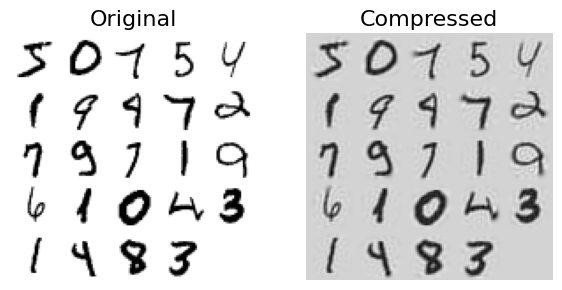

In [6]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train.to_numpy()[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

Перевіряємо чи не втратили ми велику кількість даних після зменшення компонентів

*Завдання 2: Кластеризуйте датасет, використовуючи K-Means. Знайдіть оптимальну кількість кластерів*

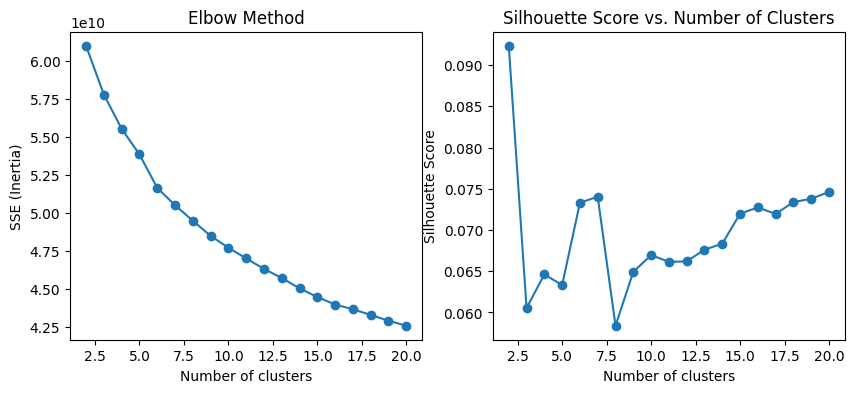

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X_train_sample = X_train_pca[:20000]

def find_optimal_clusters(X, max_k):
    sse = []
    silhouette_scores = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
        silhouette_avg = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

    return sse, silhouette_scores
sse, silhouette_scores = find_optimal_clusters(X_train_sample, 20)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(range(2, 21), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method')


plt.subplot(122)
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

plt.show()

Найкраща кількість кластерів повинна бути при великому значенні Silhouette Score і при повільному спуску SSE, мені здається найкраще значення це 11-13.

In [35]:
kmeans = KMeans(n_clusters=13, random_state=42)
kmeans.fit(X_train_sample)
from sklearn.metrics import adjusted_rand_score

cluster_labels = kmeans.labels_
ari_score = adjusted_rand_score(y_train[:20000], cluster_labels)
print(f"ARI - {ari_score:.4f}")

ARI - 0.3957


In [24]:
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(X_train_sample)

cluster_labels = kmeans.labels_
ari_score = adjusted_rand_score(y_train[:20000], cluster_labels)
print(f"ARI - {ari_score:.4f}") 


ARI - 0.3710


In [19]:
kmeans = KMeans(n_clusters=2, random_state=42) # Подивимось на найгірші значення
kmeans.fit(X_train_sample)

cluster_labels = kmeans.labels_
ari_score = adjusted_rand_score(y_train[:20000], cluster_labels)
print(f"ARI - {ari_score:.4f}")

ARI - 0.0669


Найркаще значення арі досягається при n_clusters=13, на графіку насправді можна приблизно побачити